# Simulació d'òrbites amb python (numpy)

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 27 21:52:35 2015

@author: jguillaumes
"""

import numpy as np
import matplotlib.pyplot as plt

G = 6.67384e-11
er = np.array([150e09, 0., 0.])
es = np.array([0,29.658e03, 0.])

sr = np.array([0.,0.,0.])
ss = np.array([0.,0.,0.])

em = 5.98000e24
sm = 1.98855e30

steps = 730
secs  = 365 * 24. * 3600. / steps

def gravetat(pos1, pos2, m1, m2):
    r = pos1 - pos2
    rm = np.linalg.norm(r)
    c = -1.0 * G * m1 * m2 / rm**3
    f = c * r
    return f

def newvel(v, a, t):
    return v + a*t
    
def newpos(r, v, t):
    return r + v*t
    
v0 = es;
v1 = ss;
r0 = er;
r1 = sr;
points = np.zeros((steps,2))
points[0,0] = er[0]
points[0,1] = er[1]

for i in range(1,steps):
    print("earth pos= {0:10.7},{1:10.7},{2:10.7}".format(r0[0], r0[1], r0[2]))
    f0 = gravetat(r0, r1, em, sm)
    f1 = -1.0 * f0
    a0 = f0 / em
    a1 = f1 / sm
    v0 = newvel(v0, a0, secs)
    v1 = newvel(v1, a1, secs)
    r0 = newpos(r0, v0, secs)
    r1 = newpos(r1, v1, secs)
    points[i,0] = r0[0]
    points[i,1] = r0[1]


earth pos=    1.5e+11,       0.0,       0.0
earth pos= 1.49989e+11,1.281226e+09,       0.0
earth pos= 1.49967e+11,2.562357e+09,       0.0
earth pos= 1.49934e+11,3.843301e+09,       0.0
earth pos= 1.498899e+11,5.123962e+09,       0.0
earth pos= 1.498349e+11,6.404247e+09,       0.0
earth pos= 1.497689e+11,7.684062e+09,       0.0
earth pos= 1.496918e+11,8.963313e+09,       0.0
earth pos= 1.496038e+11,1.024191e+10,       0.0
earth pos= 1.495048e+11,1.151975e+10,       0.0
earth pos= 1.493948e+11,1.279674e+10,       0.0
earth pos= 1.492738e+11,1.407279e+10,       0.0
earth pos= 1.491418e+11,1.534781e+10,       0.0
earth pos= 1.489989e+11,1.66217e+10,       0.0
earth pos= 1.488451e+11,1.789437e+10,       0.0
earth pos= 1.486803e+11,1.916573e+10,       0.0
earth pos= 1.485046e+11,2.043567e+10,       0.0
earth pos= 1.483179e+11,2.170412e+10,       0.0
earth pos= 1.481204e+11,2.297096e+10,       0.0
earth pos= 1.479119e+11,2.423612e+10,       0.0
earth pos= 1.476926e+11,2.54995e+10,       0.0
e

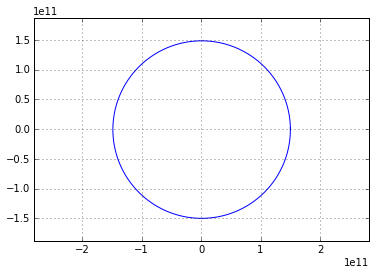

In [2]:
%matplotlib inline

plt.plot(points[:,0], points[:,1])
plt.grid(True)
plt.axis([-1.25 * er[0], 1.25 * er[0], -1.25 * er[0], 1.25 * er[0]])
ax = plt.gca()
ax.set_autoscale_on(False)
plt.axes().set_aspect('equal','datalim')
plt.show()